In [1]:
import sys
sys.path.insert(0, '/home/nuwah/2023_projects/Statistics-Handbooks') # add path to syspath where top-level of package is

In [2]:
from Regression.LinearRegression import LinearRegressionMethods
from Regression import evaluate
from DataGenerator import DataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

### Polynomial regression example

<Axes: >

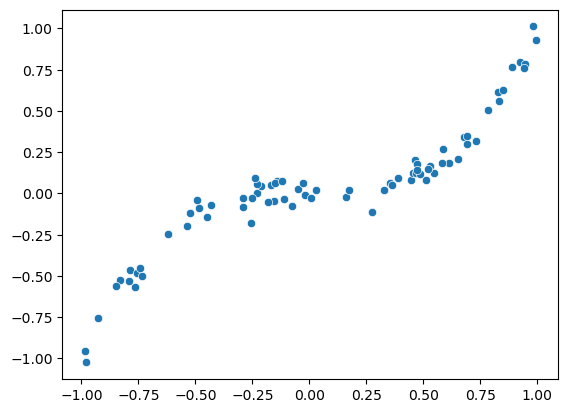

In [11]:
# Make a new DataGenerator
dg = DataGenerator(num_samples=75, domain=(-1,1), num_features=1, noise_std=0.05, seed=20) # Init data generator
p = dg.generate_polynomial(degrees=[2], coefficients=[[1,0,0]]) # This makes a simple quadratic y = x^2 (+0x+0)
p = dg.generate_polynomial(degrees=[2], coefficients=[[2,5,4]]) # This makes quadratic y = 2x^2 + 5x + 4
p = dg.generate_polynomial(degrees=[3], coefficients=[[1,0,0,0]]) # This makes simple cubic y = x^3
sns.scatterplot(x=p[0].flatten(),y=p[1])